In [1]:
import tensorflow.keras

import numpy as np 
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from tensorflow.keras import Sequential as Sequential

D:\Programme\Python3_8_MiniConda\envs\physics718\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programme\Python3_8_MiniConda\envs\physics718\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programme\Python3_8_MiniConda\envs\physics718\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programme\Python3_8_MiniConda\e

# H1.a) Implementing the Perceptron

In [2]:
class Perceptron():
    def __init__(self, niter=100, learning_rate=0.01):
        self.niter = niter
        self.learning_rate = learning_rate
        
    def activation_function(self, X):
        return 1/(1+np.exp(-X))

    def predict(self, X):
        pred = []
        for i in range(X.shape[0]):
            pred.append(self.activation_function(self.b+np.sum(X[i]+self.weights)))
        return np.array(pred)

    def train(self, X, Y):
        self.weights = np.ones(shape= X.shape[1])/2
        self.b= 0.5
        for i in range(self.niter):
            pred = self.predict(X)
            for k in range(pred.shape[0]):
                for w in range(self.weights.shape[0]):
                    self.weights[w] = self.weights[w]+self.learning_rate*(Y[k]-pred[k])*X[k,w]
                self.b = self.b+self.learning_rate*(Y[k]-pred[k])
        return

# H1.b) Dataset loading, transforming and splitting

In [3]:
df_all = pd.read_csv("train.csv")#

tag_list = list(df_all.columns.values)
tag_list.remove('signal')
goal= 'signal'

scaler = StandardScaler()
df_all[tag_list] = scaler.fit_transform(df_all[tag_list])

df_train, df_test = train_test_split(df_all, test_size=0.25)

# H1.c) Training the Perceptron and plotting ROC curve

In [4]:
percep = Perceptron(niter=100, learning_rate=0.01)
%time percep.train(df_train[tag_list].to_numpy(), df_train[goal].to_numpy())

Wall time: 1min 18s


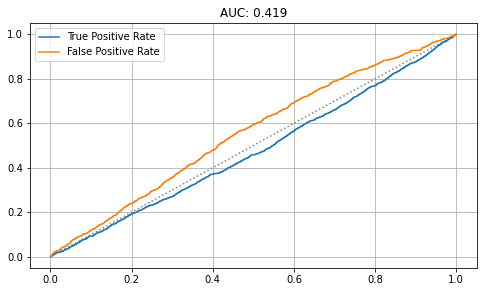

In [5]:
%matplotlib inline
df_test1 = df_test.copy()
df_test1['pred'] = percep.predict(df_test[tag_list].to_numpy())

tpr, fpr, _ = roc_curve(df_test1[goal], df_test1['pred'])
auc = roc_auc_score(df_test1[goal], df_test1['pred'])

plt.figure(0, figsize=(8,4.5))
plt.plot([0,1], [0,1], color= "grey", ls= ":")
plt.plot(tpr, np.linspace(0, 1, tpr.shape[0]), label= "True Positive Rate")
plt.plot(fpr, np.linspace(0, 1, fpr.shape[0]), label= "False Positive Rate")
plt.title("AUC: " + str(auc)[:5])
plt.grid()
plt.legend()

In [6]:
model = Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(100, activation="relu"),
    layers.BatchNormalization(axis=1),
    layers.Dense(1, activation="sigmoid")
    ])
model.summary()
model.compile(optimizer="adam", loss='mean_squared_error') 
model.fit(df_train[tag_list],df_train[goal],epochs=1000,verbose=1)

ple - loss: 0.0101
Epoch 779/1000
7500/7500 [==============================] - 0s 47us/sample - loss: 0.0103
Epoch 780/1000
7500/7500 [==============================] - 0s 50us/sample - loss: 0.0092
Epoch 781/1000
7500/7500 [==============================] - 0s 47us/sample - loss: 0.0100
Epoch 782/1000
7500/7500 [==============================] - 0s 51us/sample - loss: 0.0102
Epoch 783/1000
7500/7500 [==============================] - 0s 47us/sample - loss: 0.0112
Epoch 784/1000
7500/7500 [==============================] - 0s 48us/sample - loss: 0.0102
Epoch 785/1000
7500/7500 [==============================] - 0s 50us/sample - loss: 0.0106
Epoch 786/1000
7500/7500 [==============================] - 0s 47us/sample - loss: 0.0107
Epoch 787/1000
7500/7500 [==============================] - 0s 47us/sample - loss: 0.0107
Epoch 788/1000
7500/7500 [==============================] - 0s 50us/sample - loss: 0.0130
Epoch 789/1000
7500/7500 [==============================] - 0s 53us/sample - loss

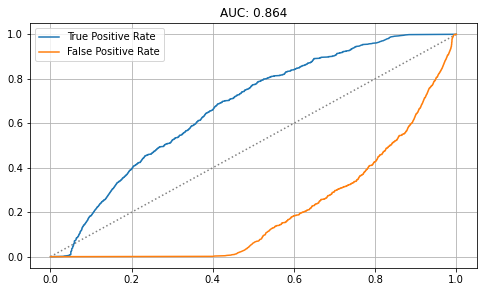

In [7]:
%matplotlib inline
df_test2 = df_test.copy()
df_test2['pred'] = model.predict(df_test[tag_list].to_numpy())

tpr, fpr, _ = roc_curve(df_test2[goal], df_test2['pred'])
auc = roc_auc_score(df_test2[goal], df_test2['pred'])

plt.figure(0, figsize=(8,4.5))
plt.plot([0,1], [0,1], color= "grey", ls= ":")
plt.plot(tpr, np.linspace(0, 1, tpr.shape[0]), label= "True Positive Rate")
plt.plot(fpr, np.linspace(0, 1, fpr.shape[0]), label= "False Positive Rate")
plt.title("AUC: " + str(auc)[:5])
plt.grid()
plt.legend()